<a href="https://colab.research.google.com/github/arddhanaza/foodprint-bangkit-capstone/blob/machine_learning/Model_Training_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
root_path = '/drive/MyDrive/datasets'
DIR_DATA = '/content/drive/MyDrive/datasets/food101/food41/images'


In [2]:
import tensorflow as tf
print(tf.__version__)
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm as note_book_tqdm

note_book_tqdm.pandas(desc='progress: ')

2.4.1


/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [3]:
# !pip install -q kaggle
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !ls ~/.kaggle
# !chmod 600 /root/.kaggle/kaggle.json  # set permission

In [4]:
#Downloading the Assets 
#!kaggle datasets download  kmader/food41 -p /content/gdrive/MyDrive/datasets/food101/
#!kaggle datasets list -s food41

In [5]:
# #Save the assets
# import os
# import zipfile
# zip_target = 'gdrive/MyDrive/datasets/food101/food41.zip'
# zip_ref = zipfile.ZipFile(zip_target,'r')
# zip_ref.extractall('gdrive/MyDrive/datasets/food101/food41')
# zip_ref.close()


In [6]:
import os
# !cp -r '/content/gdrive/MyDrive/datasets/food101/food41/images/' '/tmp/images'
# !mkdir '/tmp/images/images/test'

In [7]:
import pandas as pd

df_train = pd.read_csv('/content/drive/MyDrive/datasets/food101/food41/meta/train.txt', header=None, sep='/', names=['label','name'])
df_test = pd.read_csv('/content/drive/MyDrive/datasets/food101/food41/meta/test.txt', header=None, sep='/', names=['label','name'])
label_df = pd.read_csv('/content/drive/MyDrive/datasets/food101/food41/meta/classes.txt', header=None, sep='/', names=['label'])

df_test

,label,name
0,apple_pie,1011328
1,apple_pie,101251
2,apple_pie,1034399
3,apple_pie,103801
4,apple_pie,1038694
...,...,...
25245,waffles,942009
25246,waffles,954028
25247,waffles,96181
25248,waffles,97015


In [8]:
#Separate Assets into Training and Testing
TOTAL_TRAIN = df_train.shape[0]
TOTAL_TEST = df_train.shape[0]
TOTAL_CLASS = label_df.shape[0]

IMG_H = 200
IMG_W = 200
DATA_SETS = '/content/drive/MyDrive/datasets/food101/food41/images'

EPOCHS = 20
BATCH_SIZE = 32

SEED = 23
def make_path(row):
  return f'{DATA_SETS}/{row["label"]}/{row["name"]}.jpg'

df_train.loc[:,'path'] = df_train.progress_apply(make_path, axis =1)
df_test.loc[:,'path'] = df_test.progress_apply(make_path,axis=1)

In [9]:
label_mapper = dict(zip(df_train['label'].unique(), np.arange(len(df_train['label'].unique()))))
df_train['label_index'] = df_train['label'].map(label_mapper)
df_test['label_index'] = df_train['label'].map(label_mapper)

In [10]:
df_test['path'][0]

'/content/drive/MyDrive/datasets/food101/food41/images/apple_pie/1011328.jpg'

<function matplotlib.pyplot.show>

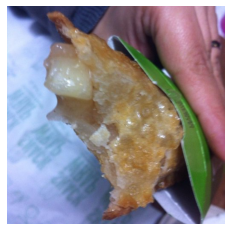

In [11]:
#Show the Image

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

img = mpimg.imread(df_test['path'][0])
plt.imshow(img)
plt.axis('Off')
plt.show


In [18]:
#Make a Model

training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = training_datagen.flow_from_dataframe(
    dataframe = df_train,
    directory = None,
    x_col="path",
    y_col="label",
    target_size=(150,150),
    batch_size=BATCH_SIZE,
    shuffle=True,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe = df_test,
    directory = None,
    x_col="path",
    y_col="label",
    target_size=(150,150),
    batch_size=BATCH_SIZE,
    shuffle=True,
    class_mode="categorical"
)

Found 75750 validated image filenames belonging to 101 classes.
Found 25250 validated image filenames belonging to 101 classes.


In [20]:
#Learn a Model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),


  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(256,activation='relu'),
  tf.keras.layers.Dense(101,activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 15, 15, 128)      

In [21]:
#Testing
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
# history = model.fit(train_generator, epochs=EPOCHS, steps_per_epoch=10,validation_data=test_generator,verbose=1,validation_steps=3)
history = model.fit(train_generator, epochs=50, steps_per_epoch=50,validation_data=test_generator,verbose=1,validation_steps=5)



Epoch 1/50
50/50 [==============================] - 423s 8s/step - loss: 4.6245 - accuracy: 0.0125 - val_loss: 4.6158 - val_accuracy: 0.0125
Epoch 2/50
50/50 [==============================] - 412s 8s/step - loss: 4.6153 - accuracy: 0.0128 - val_loss: 4.6194 - val_accuracy: 0.0188
Epoch 3/50
50/50 [==============================] - 407s 8s/step - loss: 4.6157 - accuracy: 0.0105 - val_loss: 4.6098 - val_accuracy: 0.0125
Epoch 4/50
50/50 [==============================] - 401s 8s/step - loss: 4.6126 - accuracy: 0.0104 - val_loss: 4.6098 - val_accuracy: 0.0063
Epoch 5/50
50/50 [==============================] - 399s 8s/step - loss: 4.6077 - accuracy: 0.0127 - val_loss: 4.5995 - val_accuracy: 0.0125
Epoch 6/50
50/50 [==============================] - 394s 8s/step - loss: 4.6073 - accuracy: 0.0094 - val_loss: 4.6208 - val_accuracy: 0.0125
Epoch 7/50
50/50 [==============================] - 382s 8s/step - loss: 4.5998 - accuracy: 0.0161 - val_loss: 4.6174 - val_accuracy: 0.0000e+00
Epoch 8/5

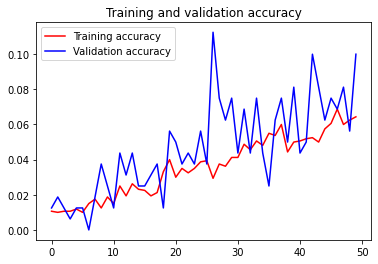

<Figure size 432x288 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [23]:
m#odel.save('model_1')

INFO:tensorflow:Assets written to: model_1/assets
